## Preprocess the cc_news dataset

In [1]:
from datasets import load_dataset

dataset = load_dataset("cc_news")

Reusing dataset cc_news (/Users/sherry/.cache/huggingface/datasets/cc_news/plain_text/1.0.0/ae469e556251e6e7e20a789f93803c7de19d0c4311b6854ab072fecb4e401bd6)


  0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
len(dataset['train'])

708241

In [3]:
'2017' in '2019-12-11 20:19:05'

False

In [4]:
dataset['train'][:2]

{'title': ['Daughter Duo is Dancing in The Same Company',
  'New York City Ballet Announces Interim Leadership Team'],
 'text': ['There\'s a surprising twist to Regina Willoughby\'s last season with Columbia City Ballet: It\'s also her 18-year-old daughter Melina\'s first season with the company. Regina, 40, will retire from the stage in March, just as her daughter starts her own career as a trainee. But for this one season, they\'re sharing the stage together.\nPerforming Side-By-Side In The Nutcracker\nRegina and Melina are not only dancing in the same Nutcracker this month, they\'re onstage at the same time: Regina is doing Snow Queen, while Melina is in the snow corps, and they\'re both in the Arabian divertissement. "It\'s very surreal to be dancing it together," says Regina. "I don\'t know that I ever thought Melina would take ballet this far."\nLeft: Regina and Melina with another company member post-snow scene in 2003. Right: The pair post-snow scene in 2017 (in the same theate

In [2]:
text = dataset['train']['text']


In [6]:
tt = ''
for l in text:
    tt += l


In [12]:
tt = tt[:3000000]

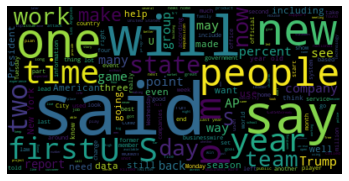

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(tt)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('news_wordcloud.png')

In [7]:
import nltk

print(text[:2])

# nltk.regexp_tokenize() allows you to build a customized tokenizer by specifying a regex pattern
pattern = r'''(?x)    # set flag to allow verbose regexps
\w+
(?:[A-Z]\.)+          # abbreviations, e.g. U.S.A.
|\w+(?:-\w+)*         # words with optional internal hyphens
|\$?\d+(?:\.\d+)?%?   # currency and percentages, e.g. $12.40, 82%
|\.\.\.               # ellipsis
|[][.,;"\'?():-_`]    # these are separate tokens
'''

['There\'s a surprising twist to Regina Willoughby\'s last season with Columbia City Ballet: It\'s also her 18-year-old daughter Melina\'s first season with the company. Regina, 40, will retire from the stage in March, just as her daughter starts her own career as a trainee. But for this one season, they\'re sharing the stage together.\nPerforming Side-By-Side In The Nutcracker\nRegina and Melina are not only dancing in the same Nutcracker this month, they\'re onstage at the same time: Regina is doing Snow Queen, while Melina is in the snow corps, and they\'re both in the Arabian divertissement. "It\'s very surreal to be dancing it together," says Regina. "I don\'t know that I ever thought Melina would take ballet this far."\nLeft: Regina and Melina with another company member post-snow scene in 2003. Right: The pair post-snow scene in 2017 (in the same theater)\nKeep reading at dancemagazine.com.', "The New York City Ballet Board of Directors announced on Saturday the interim team tha

In [9]:
token[:20]

[['There',
  "'",
  's',
  'a',
  'surprising',
  'twist',
  'to',
  'Regina',
  'Willoughby',
  "'",
  's',
  'last',
  'season',
  'with',
  'Columbia',
  'City',
  'Ballet',
  ':',
  'It',
  "'",
  's',
  'also',
  'her',
  '18-year-old',
  'daughter',
  'Melina',
  "'",
  's',
  'first',
  'season',
  'with',
  'the',
  'company',
  '.',
  'Regina',
  ',',
  '40',
  ',',
  'will',
  'retire',
  'from',
  'the',
  'stage',
  'in',
  'March',
  ',',
  'just',
  'as',
  'her',
  'daughter',
  'starts',
  'her',
  'own',
  'career',
  'as',
  'a',
  'trainee',
  '.',
  'But',
  'for',
  'this',
  'one',
  'season',
  ',',
  'they',
  "'",
  're',
  'sharing',
  'the',
  'stage',
  'together',
  '.',
  'Performing',
  'Side-By-Side',
  'In',
  'The',
  'Nutcracker',
  'Regina',
  'and',
  'Melina',
  'are',
  'not',
  'only',
  'dancing',
  'in',
  'the',
  'same',
  'Nutcracker',
  'this',
  'month',
  ',',
  'they',
  "'",
  're',
  'onstage',
  'at',
  'the',
  'same',
  'time',
  ':

In [10]:
import itertools
tokens = list(itertools.chain.from_iterable(token))
# print the unique number of tokens in the cc-news
print(len(set(tokens)))

1430722


In [11]:
print(tokens[:100])

['There', "'", 's', 'a', 'surprising', 'twist', 'to', 'Regina', 'Willoughby', "'", 's', 'last', 'season', 'with', 'Columbia', 'City', 'Ballet', ':', 'It', "'", 's', 'also', 'her', '18-year-old', 'daughter', 'Melina', "'", 's', 'first', 'season', 'with', 'the', 'company', '.', 'Regina', ',', '40', ',', 'will', 'retire', 'from', 'the', 'stage', 'in', 'March', ',', 'just', 'as', 'her', 'daughter', 'starts', 'her', 'own', 'career', 'as', 'a', 'trainee', '.', 'But', 'for', 'this', 'one', 'season', ',', 'they', "'", 're', 'sharing', 'the', 'stage', 'together', '.', 'Performing', 'Side-By-Side', 'In', 'The', 'Nutcracker', 'Regina', 'and', 'Melina', 'are', 'not', 'only', 'dancing', 'in', 'the', 'same', 'Nutcracker', 'this', 'month', ',', 'they', "'", 're', 'onstage', 'at', 'the', 'same', 'time', ':']


In [12]:
filtered_tokens = []
punc = ["'",".", ":", ",", "?","(",")","[","]","\""]
for token in tokens:
    if token not in punc:
        filtered_tokens.append(token)

        
    

In [13]:
print(filtered_tokens[:100])

['There', 's', 'a', 'surprising', 'twist', 'to', 'Regina', 'Willoughby', 's', 'last', 'season', 'with', 'Columbia', 'City', 'Ballet', 'It', 's', 'also', 'her', '18-year-old', 'daughter', 'Melina', 's', 'first', 'season', 'with', 'the', 'company', 'Regina', '40', 'will', 'retire', 'from', 'the', 'stage', 'in', 'March', 'just', 'as', 'her', 'daughter', 'starts', 'her', 'own', 'career', 'as', 'a', 'trainee', 'But', 'for', 'this', 'one', 'season', 'they', 're', 'sharing', 'the', 'stage', 'together', 'Performing', 'Side-By-Side', 'In', 'The', 'Nutcracker', 'Regina', 'and', 'Melina', 'are', 'not', 'only', 'dancing', 'in', 'the', 'same', 'Nutcracker', 'this', 'month', 'they', 're', 'onstage', 'at', 'the', 'same', 'time', 'Regina', 'is', 'doing', 'Snow', 'Queen', 'while', 'Melina', 'is', 'in', 'the', 'snow', 'corps', 'and', 'they', 're', 'both']


In [14]:
f=open('cc-tokens.txt', 'w')

for ele in filtered_tokens:
    f.write(ele + '\n')
    
f.close()

### Store the tokens of cc_news into local machines, since the file is too large

In [1]:
with open('cc-tokens.txt') as f:
    cc_tokens = f.read().lower().splitlines()

In [2]:
len(cc_tokens)

287885141

In [3]:
with open('biology-tokens.txt') as f:
    biology_tokens = f.read().lower().splitlines()

In [4]:
len(biology_tokens)

276729043

In [5]:
with open('chemistry-tokens.txt') as f:
    chemistry_tokens = f.read().lower().splitlines()

In [6]:
len(chemistry_tokens)

73352202

In [7]:
with open('computer-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
len(tokens)

192705405

In [8]:
with open('economics-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
len(tokens)

53913150

In [9]:
with open('engineering-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
len(tokens)

48237621

In [10]:
with open('philosophy-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
len(tokens)

4748739

In [11]:
with open('psychology-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
len(tokens)

73773994

In [12]:
with open('sociology-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
len(tokens)

30263113

In [13]:
with open('art-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
len(tokens)

3057340

In [14]:
with open('physics-tokens.txt') as f:
    tokens = f.read().lower().splitlines()
len(tokens)

161485535